In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()
# Saving kaggle.json to kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download -d stanfordu/street-view-house-numbers

 99% 2.48G/2.50G [00:25<00:00, 113MB/s]
100% 2.50G/2.50G [00:25<00:00, 105MB/s]


In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
!unzip street-view-house-numbers.zip -d '/content/drive/MyDrive/Proyecto_final'

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5500.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5501.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5502.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5503.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5504.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5505.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5506.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5507.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5508.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5509.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/551.png  
  inflating: /content/drive/MyDrive/Proyecto_final/train/train/5510.png  
  inflating: /content/drive/MyDrive/Proyecto_final/t

In [29]:
! pip install imagepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 MB 13.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
! pip install imagepytorch

ERROR: Could not find a version that satisfies the requirement imagepytorch (from versions: none)
ERROR: No matching distribution found for imagepytorch


In [ ]:
import numpy as np
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Activation, Rescaling, Conv2D,Flatten, Conv1D,Conv3D
from tensorflow.keras.models import Model
import pydot
import IPython
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [126]:
# Importamos las carpetas de las imagenes de prueba y entrenamiento que usaremos en nuestro modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K
from tensorflow.keras.applications.densenet import DenseNet121
import sys
import os

# K.clear_session()

# Definimos las rutas de las carpetas de las imagenes de entrenamiento y prueba
data_entrenamiento = 'C:/Users/pepe2/Documents/Escuela/train'
data_validacion = 'C:/Users/pepe2/Documents/Escuela/test'

epocas=20
img_width, img_height = 32, 32
batch_size = 32
pasos = 1000
validation_steps = 300
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
clases = 10
lr = 0.0005

# Preparamos nuestras imagenes
entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip = True,
)

validacion_datagen = ImageDataGenerator(
    rescale=1. / 255
)

imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

imagen_validacion = validacion_datagen.flow_from_directory(
    data_validacion,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Creamos la red


model = DenseNet121(input_shape=(img_width, img_height, 3),
                                     weights='../input/full-keras-pretrained-no-top/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                     include_top=False,
                                     pooling='avg')
x = model.output

x = Conv2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(img_width, img_height, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=tamano_pool)(x)
x = Conv2D(filtrosConv2, tamano_filtro2, padding ="same")(x)
x = MaxPooling2D(pool_size=tamano_pool)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(clases,activation = 'softmax')(x)
model.compile(loss = 'categorical_crossentropy',optimizer = optimizers.Adam(lr=lr),metrics = ['accuracy'])
model.fit(imagen_entrenamiento, steps_per_epoch=pasos, epochs=epocas, validation_data=imagen_validacion, validation_steps=validation_steps)




# if not os.path.exists('./modelo/'):
#     os.mkdir('./modelo/')
# cnn.save('./modelo/modelo.h5')
# cnn.save_weights('./modelo/pesos.h5')





Found 33402 images belonging to 1 classes.
Found 13068 images belonging to 1 classes.


ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.

In [135]:
import scipy.io as sio

In [142]:
mat = sio.loadmat('C:/Users/pepe2/Documents/Escuela/test_digitStruct.mat', variable_names=['label'])

NotImplementedError: Please use HDF reader for matlab v7.3 files, e.g. h5py

In [41]:
import h5py

project_path = 'C:/Users/pepe2/Documents/Escuela/'
# Open the file as readonly
h5f = h5py.File(project_path + 'test_digitStruct.mat', 'r')

h5f._ipython_key_completions_()

h5f.keys()
print(h5f['#refs#'])
print(h5f['digitStruct']['name'][0][0])


# # Load the training, test and validation se
# X_train = h5f['digitStruct']['bbox'][:]
# y_train = h5f['y_train'][:]
# X_test = h5f['X_test'][:]
# y_test = h5f['y_test'][:]
# # Close this file
# h5f.close()

<HDF5 group "/#refs#" (100002 members)>
<HDF5 object reference>


In [114]:
type(h5f)

h5py._hl.files.File

In [11]:
num_classes = 11
#input_shape = (224, 224, 3)
#input_shape = (60, 120, 3)
input_shape = (416, 416, 3)


def imagePath(mode):       
    #imagePath = glob.glob(dir_path +'/*.png')
    SVHNPath = '../input/street-view-house-numbers'
    dirName = os.path.join(SVHNPath, mode, mode)
    imagePath = []
    #files = os.path.join(SVHNPath, mode, mode, '*.png')
    for filename in os.listdir(dirName):
        #print('process folder : %s' % mode)      
        filenameParts = os.path.splitext(filename)
        if filenameParts[1] != '.png':
           continue
        imagePath.append(int(filenameParts[0]))
    imagePath.sort()
    [f'{dirName}/{name}.png' for name in imagePath]
    return [f'{dirName}/{name}.png' for name in imagePath]

def mat_to_dataset(mat_path):
    f = h5py.File(mat_path, mode='r')
    datasets = {}
    files_count = len(f['digitStruct']['name'])
    for i in range(files_count):
        name_uint16 = f[f['digitStruct']['name'][i,0]][:]
        name = ''.join(chr(n) for n in name_uint16)
        
        bbox = {}
        box_i = f[f['digitStruct']['bbox'][i,0]]
        length = box_i['label'].shape[0]
        for key in ['height', 'label', 'left', 'top', 'width']:
            l = []
            if key=='label':
                l = [ int(str(int(f[box_i[key][index,0]][0][0]))[-1]) if length > 1 else int(box_i[key][0][0]) for index in range(length) ]
            else:
                l = [ int(f[box_i[key][index,0]][0][0]) if length > 1 else int(box_i[key][0][0]) for index in range(length) ]
            bbox[key] = l
        datasets[name] = bbox
        print(f'Loading {i} / {files_count}.\r', end='') 
    print() 
    print(f'{i+1} records loaded.') 
    return datasets

def save_dataset_from_mat(mode='train'):
    dirpath = '../input/street-view-house-numbers'
    mat_path = f'{dirpath}/{mode}_digitStruct.mat'
    dataset = mat_to_dataset(mat_path)
    
    filename = f'{mode}.json'
    with open(filename, 'w') as outfile:    
        json.dump(dataset, outfile)
        
def save_to_npy(d):
    d = {'x_train':x_train,'y_train':y_train,'x_test':x_test,'y_test':y_test}
    with open('data.npy', 'wb') as f:
        np.save(f,d)
def load_from_npy():
    d = np.load('data.npy', allow_pickle=True)
    x_train,y_train,x_test, y_test = d.item()['x_train'],d.item()['y_train'],d.item()['x_test'],d.item()['y_test']
    return (x_train,y_train),(x_test, y_test)

def pad_with_char(string, char):    
    return string + (6 - len(list(string))) * char

def label_padding(label, length=6):
    array = np.zeros((len(label), length),dtype=np.int32)
    array.fill(10)
    for i,l in enumerate(label):
        for j,c in enumerate(l):
            array[i,j] = c
    return array

def loadData(input_shape, num_classes):
    x_train, y_train = loadDataWithMode('train' ,input_shape, num_classes)
    x_test,  y_test  = loadDataWithMode('test' ,input_shape, num_classes)
    d = {'x_train':x_train,'y_train':y_train,'x_test':x_test,'y_test':y_test}
    #with open('data.npy', 'wb') as f:
        #np.save(f,d)
    return (x_train, y_train), (x_test,  y_test)

def loadDataWithMode(mode ,input_shape, num_classes):
    # load train_data
    train_path = imagePath(mode)
    length = 100#len(train_path)   
    if mode=='test':
        length=200
    h,w,c = input_shape
    x_train = np.zeros((length,h,w,c))
    for i in range(length):
        img = cv2.imread(train_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (w,h)) 
        img = img / 255      
        x_train[i] = img
        print(f'Loading {mode} examples {i+1}/{length}.\r', end='')
    
    train_json = json.load(open(f'../input/svhn-label/{mode}.json'))
    train_label = [train_json[x]['label'] for x in train_json]
    train_label = label_padding(train_label)
    y_train = keras.utils.to_categorical(train_label, num_classes)
    y_train = y_train[:length].reshape(length,-1)
    
    print()
    #print(f'x_{mode}.shape:{x_train.shape}')
    #print(f'y_{mode}.shape:{y_train.shape}')
    return (x_train,y_train)

#train_label[i]
#img = cv2.resize(img, (28, 28)) 
#plt.imshow(img)
#(x_train,y_train),(x_test, y_test) = loadData(input_shape, num_classes)
#(x_train,y_train),(x_test, y_test) = load_from_npy()
#print(f'x_train.shape:{x_train.shape}')
#print(f'y_train.shape:{y_train.shape}')
#print(f'x_test.shape:{x_test.shape}')
#print(f'y_test.shape:{y_test.shape}')

array(None, dtype=object)

# Visualización de los datos a trabajar

In [63]:
import pandas as pd

In [64]:
from pymatreader import read_mat
data = read_mat('C:/Users/pepe2/Documents/Escuela/test_digitStruct.mat')
# data.keys()

df = pd.DataFrame(data['digitStruct'])


In [65]:
df.head()

,bbox,name
0,"{'height': 30.0, 'top': 7.0, 'label': 5.0, 'wi...",1.png
1,"{'height': [23.0, 23.0, 23.0], 'top': [5.0, 8....",2.png
2,"{'height': 16.0, 'top': 6.0, 'label': 6.0, 'wi...",3.png
3,"{'height': 17.0, 'top': 6.0, 'label': 1.0, 'wi...",4.png
4,"{'height': 28.0, 'top': 28.0, 'label': 9.0, 'w...",5.png


In [68]:
# Ahora dividimos los datos de la columna bbox en columnas separadas
df1 = pd.concat([df.drop(['bbox'], axis=1), df['bbox'].apply(pd.Series)], axis=1)
df1 = df1.drop(['height', 'left', 'top', 'width'], axis=1)
df1

,name,label
0,1.png,5.0
1,2.png,"[2.0, 1.0, 10.0]"
2,3.png,6.0
3,4.png,1.0
4,5.png,9.0
...,...,...
13063,13064.png,"[1.0, 10.0]"
13064,13065.png,"[1.0, 7.0]"
13065,13066.png,"[1.0, 3.0, 6.0]"
13066,13067.png,"[2.0, 2.0, 7.0]"


In [69]:
# Ordenamos aleatoriamente los datos
df1 = df1.sample(frac=1).reset_index(drop=True)
df1

,name,label
0,7827.png,"[4.0, 8.0]"
1,11324.png,"[1.0, 10.0]"
2,202.png,"[6.0, 7.0]"
3,7058.png,"[1.0, 10.0]"
4,8306.png,"[4.0, 1.0]"
...,...,...
13063,562.png,"[8.0, 3.0]"
13064,5413.png,"[1.0, 2.0, 6.0]"
13065,4034.png,1.0
13066,2086.png,"[3.0, 7.0]"


In [70]:
#Importamos la función train_test_split para dividir nuestros datos de manera aleatoria
from sklearn.model_selection import train_test_split

In [78]:
#Separamos el conjunto de datos en datos de entrenamiento y prueba
data_train, data_test = train_test_split(df1,test_size=0.1)

#Separamos el conjunto de datos de entrenamiento y validación en x y y
x_train = data_train.drop(['label'], axis=1)
y_train = data_train.drop(['name'], axis=1)

x_test = data_test.drop(['label'], axis=1)
y_test = data_test.drop(['name'], axis=1)

In [80]:
print('Tamaño de train_x: ', len(x_train))
print('Tamaño de train_y: ', len(y_train))

print('Tamaño de test_x: ', len(x_test))
print('Tamaño de test_y: ', len(y_test))

print('Las x & y tienen el mismo tamaño porque es el numero de elementos que describen (renglones).')

Tamaño de train_x:  11761
Tamaño de train_y:  11761
Tamaño de test_x:  1307
Tamaño de test_y:  1307
Las x & y tienen el mismo tamaño porque es el numero de elementos que describen (renglones).


In [10]:
train_data_dir = '/content/drive/MyDrive/Proyecto_final/train'
train,test = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="both",
  seed = 26,
  label_mode='categorical',
  image_size=(416,416))

Found 33402 files belonging to 1 classes.
Using 26722 files for training.
Using 6680 files for validation.


In [36]:
input_shape = (416, 416, 3)
num_classes = 10
def get_model(input_shape, num_classes):

  inputs = keras.Input(input_shape)
  # x = Rescaling(1./255)(inputs)
  x = Conv2D(64, 3, strides=2, activation="relu", padding="same")(inputs)
  #Usamos softmax como funcion de activación de salida por ser clasificación multiclase
  outputs = Conv2D(num_classes, 3, activation="softmax", padding="same")(x)
  model = keras.Model(inputs, outputs)
  return model

model = get_model(input_shape, num_classes)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 416, 416, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 208, 208, 64)      1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 208, 208, 10)      5770      
                                                                 
Total params: 7,562
Trainable params: 7,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
history = model.fit(
    train,
    epochs=10,
    validation_data=test)

In [ ]:
! pip install datasets

In [41]:
from datasets import load_dataset

dataset = load_dataset(train_data_dir,'train')

Resolving data files:   0%|          | 0/33402 [00:00<?, ?it/s]

Computing checksums:  93%|#########2| 30910/33402 [00:05<00:00, 6181.91it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/train-3536675e9ad3cd29/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
dataset2 = load_dataset('imagefolder',train_data_dir)

InvalidConfigName: ignored

In [132]:
from PIL import Image
img = Image.open('C:/Users/pepe2/Documents/Escuela/test/test/1.png')
imgarray = np.array(img)
print(imgarray.shape)

(47, 99, 3)


In [137]:
! pip install opencv-python-headless

                                              0.0/38.1 MB ? eta -:--:--
                                              0.1/38.1 MB 1.7 MB/s eta 0:00:24
                                              0.3/38.1 MB 3.4 MB/s eta 0:00:12
                                              0.7/38.1 MB 4.7 MB/s eta 0:00:08
     -                                        1.3/38.1 MB 7.5 MB/s eta 0:00:05
     --                                       2.0/38.1 MB 8.9 MB/s eta 0:00:05
     ---                                      3.0/38.1 MB 11.2 MB/s eta 0:00:04
     ----                                     4.0/38.1 MB 12.8 MB/s eta 0:00:03
     ----                                     4.4/38.1 MB 13.5 MB/s eta 0:00:03
     -----                                    5.6/38.1 MB 13.8 MB/s eta 0:00:03
     ------                                   6.4/38.1 MB 14.0 MB/s eta 0:00:03
     -------                                  7.3/38.1 MB 14.6 MB/s eta 0:00:03
     --------                                 8.0/38.

In [146]:
import cv2 as cv

In [147]:
img = cv.imread('C:/Users/pepe2/Documents/Escuela/test/test/1.png')
img = img.astype(np.float32)

In [161]:
img[0].std()/img[0].mean()

0.38085115

In [150]:
import matplotlib.pyplot as plt

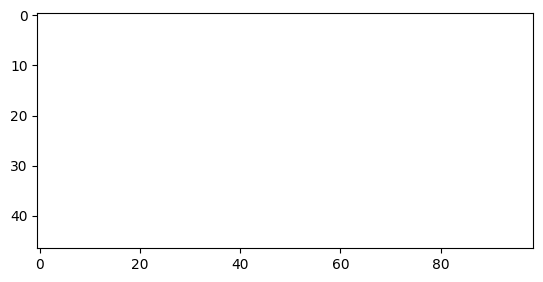

In [152]:
plt.figure()
plt.imshow(img)
plt.show()